# __Text Classification using RNN__

Let's see how to classify the text using RNN (Recurrent Neural Network).

We'll be using `nltk` (Natural Language Toolkit), which is a popular open-source library in Python for working with human language data. While NLTK is not specifically designed for Recurrent Neural Networks (RNNs), it provides a wide range of tools and resources that can be useful in preprocessing and preparing text data for training RNNs and other natural language processing (NLP) models.

Here's how NLTK can play a role in working with RNNs:

1. Text preprocessing: NLTK offers various modules for text preprocessing tasks, such as tokenization (splitting text into words or sentences), stemming, lemmatization, and stop word removal. These preprocessing steps are often necessary before feeding text data into an RNN or other NLP model.

2. Corpus handling: NLTK provides access to a variety of corpora (collections of text data), including popular ones like the Brown Corpus, Reuters Corpus, and others. These corpora can be used for training and evaluating RNNs on various NLP tasks like text classification, language modeling, or machine translation.

3. Feature extraction: NLTK includes tools for extracting linguistic features from text, such as part-of-speech tags, named entities, and more. These features can be used as additional inputs or in conjunction with the text data when training RNNs for certain NLP tasks.

4. Evaluation metrics: NLTK provides implementations of various evaluation metrics commonly used in NLP, such as BLEU score for machine translation, perplexity for language modeling, and others. These metrics can be used to assess the performance of RNN models trained for different NLP tasks.

5. Text generation: While not directly related to RNNs, NLTK offers utilities for generating text data, which can be useful for tasks like data augmentation or creating synthetic data for training RNN models.

It's important to note that while NLTK provides many useful tools for working with text data, it does not include built-in support for training and implementing RNNs or other deep learning models. For that, you would typically use deep learning libraries like TensorFlow, PyTorch, or Keras, which can be combined with NLTK for data preprocessing and evaluation.

In summary, NLTK serves as a powerful toolkit for various NLP tasks, including data preprocessing, corpus handling, feature extraction, and evaluation, which can be leveraged in conjunction with deep learning libraries to train and deploy RNN models for various natural language processing applications. 

Some concepts to be aware of:

- **Tokenization** refers to breaking down text into smaller units called **tokens**. These tokens can be words, phrases, or sentences.
   - NLTK provides two major types of tokenization:
     - **Word Tokenization**: Splits text into individual words. For example, the sentence "I study Machine Learning on GeeksforGeeks" would be word-tokenized as `['I', 'study', 'Machine', 'Learning', 'on', 'GeeksforGeeks', '.']`.
     - **Sentence Tokenization**: Breaks text into individual sentences. For instance, the input "I study Machine Learning on GeeksforGeeks. Currently, I'm studying NLP" would be sentence-tokenized as `['I study Machine Learning on GeeksforGeeks.', 'Currently, I'm studying NLP.']`.

- **Lower Case Conversion**:
   - To avoid redundancy in token lists, we convert all words to lowercase. This ensures that the model doesn't treat differently cased words as distinct.
   - Example Python code:
     ```python
     import re
     text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
     words = text.split()
     ```

- **Stop Words Removal**:
   - Stop words (e.g., "the," "and," "is") don't contribute much to the meaning of a sentence. Removing them helps clean the data.
   - NLTK provides a list of English stop words.
   - Example Python code:
     ```python
     from nltk.corpus import stopwords
     print(stopwords.words("english"))
     ```

- **Lexicon**:
   - A lexicon is a collection of words and their meanings. It can also include information like part of speech (noun, verb, etc.).
   - NLTK provides access to various lexicons for different purposes.
   - examples:
      - “Tsunami”: Pronounced as /tsuːˈnɑːmi/.
      - “Run” (verb) vs. “Run” (noun)
      - “Dog”: Refers to a domesticated mammal of the species Canis lupus familiaris.


- **Recurrent Neural Networks (RNNs)**:
   - RNNs are a type of neural network architecture designed for sequential data (e.g., time series, text).
   - Key features:
     - **Hidden State**: Remembers information about a sequence. It's also called the memory state.
     - **Parameter Sharing**: Uses the same parameters for each input, allowing it to process sequences of varying lengths.
   - RNNs are widely used for tasks like language modeling, machine translation, and sentiment analysis.

In summary, NLTK focuses on traditional NLP techniques, while RNNs are part of deep learning models. Combining both can lead to powerful natural language processing systems!


`pip install nltk`

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bassel_instructor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Steps to  Be Followed:

1. Importing the libraries
2. Defining the hyperparameter
3. Preprocessing the data and printing the lengths of the labels and articles lists.
4. Splitting the data into training and validation sets
5. Initializing a tokenizer and fitting it on the training articles
6. Converting the training articles into sequences using the tokenizer
7. Padding the sequence
8. Printing the length of validation Sequences and the shape of validation padded
9. Training the model
10. Compiling the model
11. Plotting the graph

### Step 1: Importing the libraries
- Import the required libraries

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #transforms a list into a 2D NumPy array of shape (num_samples, num_timesteps)
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt


### Step 3: Preprocessing the Data and Printing the Lengths of the Labels and Articles Lists.

- Define two empty lists, articles, and labels to store the articles and labels, respectively
- Read the contents of the **bbc-text.csv** file using csv.reader and iterate through each row
- Extract the label from the first column of each row and append it to the labels list
- Process the article from the second column by removing stopwords and replacing consecutive spaces with a single space and then append it to the articles list
- Print the lengths of the labels and articles lists to display the number of labels and processed articles, respectively

In [10]:
articles = [] #blank list for articles from the doc
labels = [] #blank list of labels

with open('/Users/bassel_instructor/Documents/datasets/bbc-text.csv', 'r') as csvfile: #It opens the file in read mode ('r').
    reader = csv.reader(csvfile, delimiter=',') #read csv with comma delimiter
    next(reader) #skip the first row of the CSV file, which typically contains headers 
    for row in reader: #iterate for each row
        labels.append(row[0])
        
        article = row[1]
        #For each article, it loops through a predefined list named STOPWORDS
        #For every word in STOPWORDS, it removes occurrences of the word surrounded by spaces from the article. 
        #This is a rudimentary way of removing stopwords from the text to presumably clean it for further processing or analysis.
        for word in STOPWORDS: 
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
        articles.append(article)


In [11]:
print(len(labels))
print(len(articles))

2225
2225


In [12]:
labels[:9]

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport']

In [13]:
articles[:9]

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companie

__Observations:__
- There are only **2,225** articles in the data.
- Then, we split into a training set and validation set, according to the parameter we set earlier, 80% for training, and 20% for validation.

### Step 4: Splitting the Data into Training and Validation Sets
- Set the value of __training_portion__ to __0.8__, representing the proportion of data to be used for training
- Calculate the **train_size** by multiplying the length of the articles list with __training_portion__ and converting it to an integer
- Create **train_articles** by slicing the articles list from index **0** to **train_size**
- Create **train_labels** by slicing the labels list from index** 0 **to **train_size**
- Create validation_articles by slicing the articles list from **train_size** onward
- Create **validation_labels** by slicing the labels list from **train_size** onward
- Print the **train_size** to display the calculated value

- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** represent the number of items in each list.

In [4]:
training_portion = .8

In [16]:
train_size = int(len(articles) * training_portion)
train_size

1780

In [17]:
#train data
train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

print(len(train_articles))
print(len(train_labels))


1780
1780


In [18]:
# testing data
validation_articles = articles[train_size:]
validation_labels = labels[train_size:]
print(len(validation_articles))
print(len(validation_labels))

445
445


__Observations:__
- The value of **train_size** is calculated based on the proportion of training data.
- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** representing the number of items in each list.

### Step 4b: Defining the Hyperparameter
- Set the value of __vocab_size__ to __5000__, representing the size of the vocabulary
- Set the value of __embedding_dim__ to __64__, specifying the dimensionality of the word embeddings
- Set the value of __max_length__ to __200__, indicating the maximum length of input sequences
- Set the value of __padding_type__ to __post__, specifying that padding should be added at the end of sequences
- Set the value of __trunc_type__ to __post__, indicating that truncation should be applied at the end of sequences
- Set the value of __oov_tok__ to __OOV__, representing the token to be used for out-of-vocabulary words


In [19]:
vocab_size = 5000 
embedding_dim = 64
max_length = 200
padding_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'


### Step 5: Initializing a Tokenizer and Fitting It on the Training Articles

- Initialize a **Tokenizer** object named tokenizer with the specified parameters: **num_words** representing the vocabulary size and **oov_token** representing the out-of-vocabulary token
    - The Tokenizer is used to vectorize text data, turning each text into a sequence of integers. The num_words parameter is the maximum number of words to keep, based on word frequency. The oov_token parameter is the string to use to represent words that are not in the vocabulary.
    - We set it to 5000, which means only the top 4,999 words (by frequency of appearance in the dataset) are included in the tokenizer's vocabulary. All other words are ignored or treated as out-of-vocabulary (OOV) and can be handled in various ways, such as being replaced by a placeholder token.
    - Purpose:
        - **Vocabulary Size Reduction**: It reduces the size of the vocabulary to the most common words. This can help in reducing the complexity of the model and the amount of memory needed for training.
        - **Focus on Relevant Words**: By limiting the vocabulary to more frequent words, it's assumed that these words carry more meaning for the tasks (e.g., classification, sentiment analysis) than less frequent words.
    - Choosing the best value for `num_words` depends on several factors and might require experimentation. Here are some considerations:

        1. **Dataset Specificity**: Larger datasets with a wide variety of topics might require a larger vocabulary to capture the essence of the texts accurately. In contrast, smaller or more topic-focused datasets might not need as large a vocabulary.

        2. **Memory and Performance Constraints**: A larger `num_words` value increases the model's size and computational requirements. If resources are limited, you might need to find a balance between performance and resource availability.

        3. **Task Complexity**: More complex tasks or nuanced differences between classes might benefit from a more extensive vocabulary to capture subtle language differences.

        4. **Experimentation**: Often, the best way to determine the optimal `num_words` value is through experimentation. Start with a value that seems reasonable based on your dataset size and complexity, then train your model and evaluate its performance. Adjust the `num_words` parameter based on your results, looking for improvements in model accuracy or other relevant metrics.

        5. **Baseline Models**: Look at similar tasks or studies to see if there are commonly used values for `num_words` that could serve as a starting point.

        6. **Impact of Rare Words**: Consider the impact of rare words on your specific task. In some cases, rare words might be highly relevant, and you might need a strategy to include them, such as using pre-trained embeddings that can handle a wider vocabulary.

- Fit the tokenizer on the training articles **(train_articles)** using the **fit_on_texts** method
- This step updates the tokenizer's internal word index based on the words in the training articles
- Assign the word index obtained from the tokenizer to the variable **word_index**
- Extract the first 10 items from the word_index dictionary
- Print the resulting dictionary

In [20]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)


In [21]:
#This line builds the word index by analyzing the train_articles text data. 
#It creates a mapping of words to integers based on the word frequency in the training data.
tokenizer.fit_on_texts(train_articles)

#This line retrieves the word index created by the fit_on_texts method.
word_index = tokenizer.word_index

In [24]:
#We should see the mapping between words and their integer representations for the first 10 words in the vocabulary.

word_index

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'government': 16,
 'world': 17,
 'uk': 18,
 'best': 19,
 'years': 20,
 'make': 21,
 'film': 22,
 'told': 23,
 'made': 24,
 'get': 25,
 'music': 26,
 'game': 27,
 'like': 28,
 'back': 29,
 'many': 30,
 '000': 31,
 'labour': 32,
 'three': 33,
 'well': 34,
 '1': 35,
 'next': 36,
 'bbc': 37,
 'take': 38,
 'set': 39,
 'number': 40,
 'added': 41,
 'way': 42,
 'market': 43,
 '2': 44,
 'company': 45,
 'may': 46,
 'says': 47,
 'election': 48,
 'home': 49,
 'party': 50,
 'good': 51,
 'going': 52,
 'much': 53,
 'work': 54,
 '2004': 55,
 'still': 56,
 'win': 57,
 'show': 58,
 'think': 59,
 'games': 60,
 'go': 61,
 'top': 62,
 'second': 63,
 'million': 64,
 '6': 65,
 'england': 66,
 'firm': 67,
 'since': 68,
 'week': 69,
 'say': 70,
 'play': 71,
 'part': 72,
 'public': 73,
 'use': 74,
 'blair': 75,
 '3': 76,
 'want'

In [25]:
#print out a sample
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

__Observations:__
- The code prints a dictionary containing the first 10 items from the word_index dictionary.
- These items represent a subset of the word-to-index mappings generated by the tokenizer.

### Step 6: Converting the Training Articles into Sequences Using the Tokenizer
- Convert the training articles **(train_articles)** into sequences using the **texts_to_sequences** method of the tokenizer object and assign the result to **train_sequences**
- Print the sequence representation of the 11th training article (index 10) by accessing **train_sequences[10]**

In [9]:
#The texts_to_sequences method converts the train_articles text data into a list of integer sequences, using the word index created earlier. 
#Each word in the text is replaced by its corresponding integer value from the word index.
train_sequences  = tokenizer.texts_to_sequences(train_articles)

print(train_sequences[10])

[2432, 1, 225, 4995, 22, 642, 586, 225, 4995, 1, 1, 1662, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1144, 1693, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2874, 1506, 352, 4739, 1, 52, 341, 1, 352, 2173, 3963, 41, 22, 3793, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3663, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1693, 1021, 1, 4997, 807, 1865, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1606, 4998, 542, 492, 1, 1443, 4741, 778, 1320, 1, 1862, 10, 33, 642, 319, 1, 62, 478, 564, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1365, 6, 1, 2432, 564, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


__Observation:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

### Step 7: Padding the Sequence
- Pad the sequences in **train_sequences** using the **pad_sequences** function
- Set the maximum length of the padded sequences to **max_length**
- Specify the padding type as **padding_type** and the truncation type as **trunc_type**
- Assign the padded sequences to the variable **train_padded**

In [10]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
print(train_sequences[10])

[2432, 1, 225, 4995, 22, 642, 586, 225, 4995, 1, 1, 1662, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1144, 1693, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2874, 1506, 352, 4739, 1, 52, 341, 1, 352, 2173, 3963, 41, 22, 3793, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3663, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1693, 1021, 1, 4997, 807, 1865, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1606, 4998, 542, 492, 1, 1443, 4741, 778, 1320, 1, 1862, 10, 33, 642, 319, 1, 62, 478, 564, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1365, 6, 1, 2432, 564, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


__Observations:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

In [12]:
print(train_padded[10])

[2432    1  225 4995   22  642  586  225 4995    1    1 1662    1    1
 2432   22  564    1    1  140  278    1  140  278  796  822  662 2308
    1 1144 1693    1 1720 4996    1    1    1    1    1 4738    1    1
  122 4515    1    2 2874 1506  352 4739    1   52  341    1  352 2173
 3963   41   22 3793    1    1    1    1  542    1    1    1  835  631
 2367  347 4740    1  365   22    1  787 2368    1 4302  138   10    1
 3663  682 3531    1   22    1  414  822  662    1   90   13  633    1
  225 4995    1  600    1 1693 1021    1 4997  807 1865  117    1    1
    1 2974   22    1   99  278    1 1606 4998  542  492    1 1443 4741
  778 1320    1 1862   10   33  642  319    1   62  478  564  301 1507
   22  479    1    1 1665    1  797    1 3067    1 1365    6    1 2432
  564   22 2971 4735    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

__Observation:__
- The code prints the padded sequence representation of the 11th training article.
- The output is a list of integers representing the word indices of the corresponding words in the article, after applying padding to ensure a consistent length (max_length) for all sequences.

### Step 8: Printing the Length of Validation Sequences and the Shape of Validation Padded
- Convert the validation articles into sequences using the tokenizer and pad the sequences to a maximum length. Assign the result to **validation_padded**
- Print the length of **validation_sequences** and the shape of **validation_padded**
- Create a tokenizer for the labels and fit it on the labels list
- Convert the training and validation labels into sequences using the label tokenizer and store the results in **training_label_seq** and **validation_label_seq** as NumPy arrays

In [13]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


__Observations:__
- The length of **validation_sequences**, indicating the number of sequences in the validation set.
- The shape of **validation_padded**, representing the dimensions of the padded validation sequences.

In [14]:
print(set(labels))

{'tech', 'business', 'entertainment', 'sport', 'politics'}


__Observation:__
- The output is a set containing the unique labels: 'business', 'tech', 'entertainment', 'politics', and 'sport'.

In [15]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

__Observations:__
- The output of this code is the conversion of label sequences for the training and validation sets.
- The **training_label_seq** and **validation_label_seq** are NumPy arrays containing the label sequences for the respective sets, based on the word index mapping generated by the **label_tokenizer**

### Step 9: Training the Model
- Create a sequential model using **tf.keras.Sequential()**
- Add an embedding layer to the model with the specified vocabulary size **(vocab_size)** and embedding dimension **(embedding_dim)**
- Add a bidirectional SimpleRNN layer to the model with the same embedding dimension
- Add a dense layer to the model with the embedding dimension as the number of units and **relu** activation function
- Add a dense layer with 6 units and the **softmax** activation function to the model
- Print a summary of the model's architecture using **model.summary()**

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

__Observation:__
- The code outputs a summary of the model's architecture, including the number of parameters and the shape of each layer in the model.

### Step 10: Compiling the Model
- Compile the model using **model.compile()** with the loss function set to **sparse_categorical_crossentropy**, the optimizer set to **adam**, and the metrics set to **accuracy**
- Set the number of epochs to 10
- Train the model using **model.fit()** with the training padded sequences **(train_padded)** and training label sequences **(training_label_seq)**
- Specify the number of epochs as **num_epochs**, the validation data as the validation padded sequences **(validation_padded)** and validation label sequences **(validation_label_seq)**, and **verbose** mode as **2**

In [17]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 4

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)


Epoch 1/4


56/56 - 2s - 40ms/step - accuracy: 0.2421 - loss: 1.6119 - val_accuracy: 0.2539 - val_loss: 1.5840
Epoch 2/4
56/56 - 1s - 25ms/step - accuracy: 0.3685 - loss: 1.4307 - val_accuracy: 0.4292 - val_loss: 1.2958
Epoch 3/4
56/56 - 2s - 35ms/step - accuracy: 0.7247 - loss: 0.8773 - val_accuracy: 0.5393 - val_loss: 1.1314
Epoch 4/4
56/56 - 2s - 34ms/step - accuracy: 0.9708 - loss: 0.2221 - val_accuracy: 0.5843 - val_loss: 1.0987


__Observations:__
- The code trains the model for the specified number of epochs and records the training and validation accuracy and loss metrics.
- The output is an object named history that contains information about the training process, such as the loss and accuracy values at each epoch.

### Step 11: Plotting the Graph
- Define a function named **plot_graphs** that takes history and string as inputs. Inside the function, plot the training and validation values of the given metric (string) from the history object using **plt.plot()**
- Set the x-axis label as **Epochs** and the y-axis label as the given metric (string)
- Call the **plot_graphs** function twice, first with **history** and **accuracy** as arguments, and then with **history** and **loss** as arguments
- Display the generated plots showing the training and validation values of the accuracy and loss metrics over the epochs

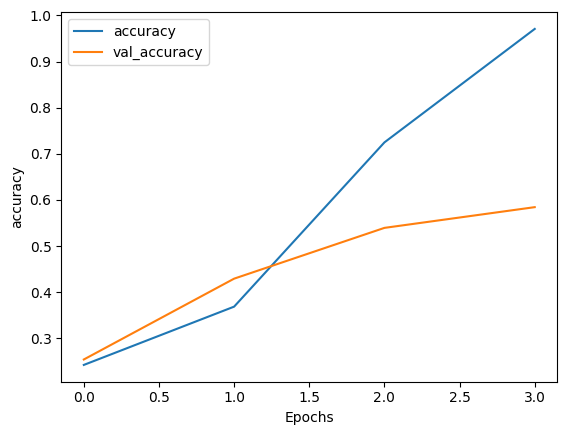

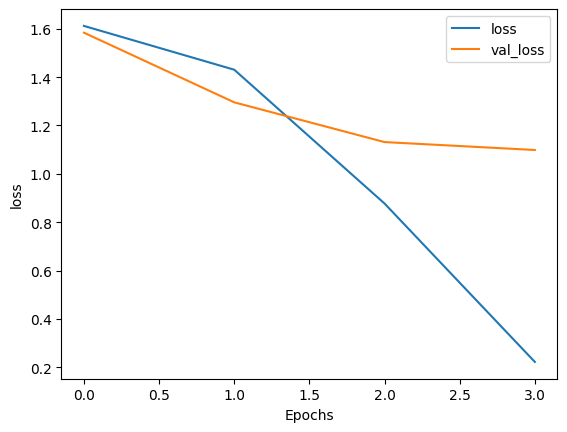

In [18]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")